In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import folium
from sklearn.preprocessing import StandardScaler
from sklearn import cluster
from sklearn import preprocessing

# k-means

In [4]:
## 데이터 불러오기
uci_path = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00292/Wholesale%20customers%20data.csv'
df = pd.read_csv(uci_path, header=0)
df

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


In [5]:
## 데이터 살펴보기
df.head() # 첫 5행 확인

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [6]:
df.info() # 요약정보 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [7]:
df.describe() # 기술통계 요약 확인

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [9]:
## 피쳐 선택 및 정규화
X = df.iloc[:,:] # 비지도학습이므로 전체 선택
print(X[:5], '\n')

X = StandardScaler().fit(X).transform(X) # 정규화
print(X[:5], '\n')

   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185 

[[ 1.44865163  0.59066829  0.05293319  0.52356777 -0.04111489 -0.58936716
  -0.04356873 -0.06633906]
 [ 1.44865163  0.59066829 -0.39130197  0.54445767  0.17031835 -0.27013618
   0.08640684  0.08915105]
 [ 1.44865163  0.59066829 -0.44702926  0.40853771 -0.0281571  -0.13753572
   0.13323164  2.24329255]
 [-0.69029709  0.59066829  0.10011141 -0.62401993 -0.3929769   0.6871443
  -0.49858822  0.09341105]
 [ 1.44865163  0.59066829  0.84023948 -0.05239645 -0.07935618  0.17385884
  -0.23191782  1.29934689]] 



In [14]:
## 학습 및 검증
kmeans = cluster.KMeans(init='k-means++', n_clusters=5, n_init=10, random_state=42) # 객체 생성
# sklearn.cluster.Kmeans(n_cluster=클러스터개수, 
#                         init=‘centeroid 지정방법’,
#                         n_init=각기 다른 랜덤한 센트로이드에서 독립적으로 실행할 횟수
#                         max_iter=한 번의 실행해서 수행할 최대 반복횟수
#                         tol=수렴을 결정하는 클러스터 내 오차 합의 변화량에 대한 허용 오차
#                         random_state=시드번호)

kmeans.fit(X) # 학습

cluster_label = kmeans.labels_ # 군집 라벨 확인
print(cluster_label, '\n')

df['Cluster'] = cluster_label # 기존 데이터프레임에 군집결과 컬럼 추가
df.head

[0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 1 0 1 1 1 1 1 1 0 1
 0 0 1 1 1 0 0 0 0 0 3 0 0 1 1 0 0 1 1 3 0 1 1 0 3 0 0 1 3 1 0 1 1 1 1 1 0
 0 1 1 0 1 1 1 0 0 1 0 3 3 1 1 1 1 1 3 1 0 1 0 1 1 1 0 0 0 1 1 1 0 0 0 0 1
 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 1 1 0 0 1 0 0 0 1 1 0 0 0 0 1 1 1 0 0 1 0 1 0 1 1 1 1 1 1 1 4 1
 1 1 1 0 0 1 1 1 0 1 1 2 0 2 2 0 0 2 2 2 0 2 2 2 0 2 3 2 2 0 2 0 2 0 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 3 2 2 2 2 2 2 2
 2 2 2 2 2 0 2 0 2 0 2 2 2 2 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 2 0
 2 0 0 2 0 0 0 0 0 0 0 2 2 0 2 2 0 2 2 0 2 2 2 0 2 2 2 2 2 4 2 2 2 2 2 0 2
 3 2 0 2 2 2 2 0 0 1 0 1 1 0 0 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1
 1 1 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 0 0 1 1 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1] 



<bound method NDFrame.head of      Channel  Region  Fresh   Milk  Grocery  Frozen  Detergents_Paper  \
0          2       3  12669   9656     7561     214              2674   
1          2       3   7057   9810     9568    1762              3293   
2          2       3   6353   8808     7684    2405              3516   
3          1       3  13265   1196     4221    6404               507   
4          2       3  22615   5410     7198    3915              1777   
..       ...     ...    ...    ...      ...     ...               ...   
435        1       3  29703  12051    16027   13135               182   
436        1       3  39228   1431      764    4510                93   
437        2       3  14531  15488    30243     437             14841   
438        1       3  10290   1981     2232    1038               168   
439        1       3   2787   1698     2510      65               477   

     Delicassen  cluster  Cluster  
0          1338        0        0  
1          1776      

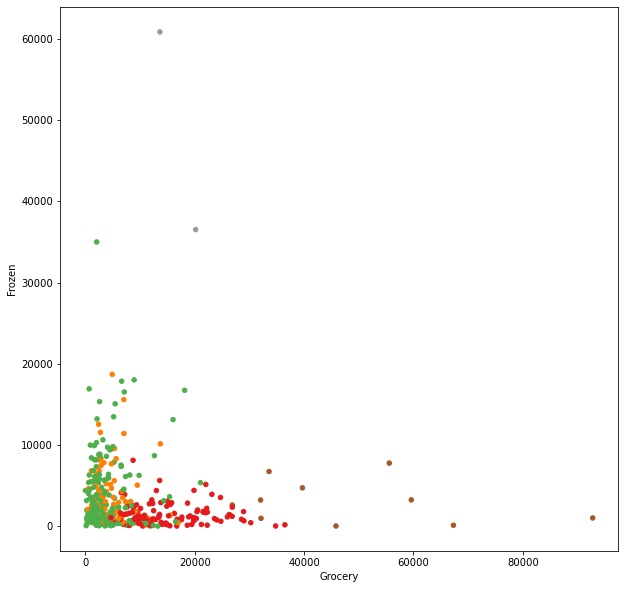

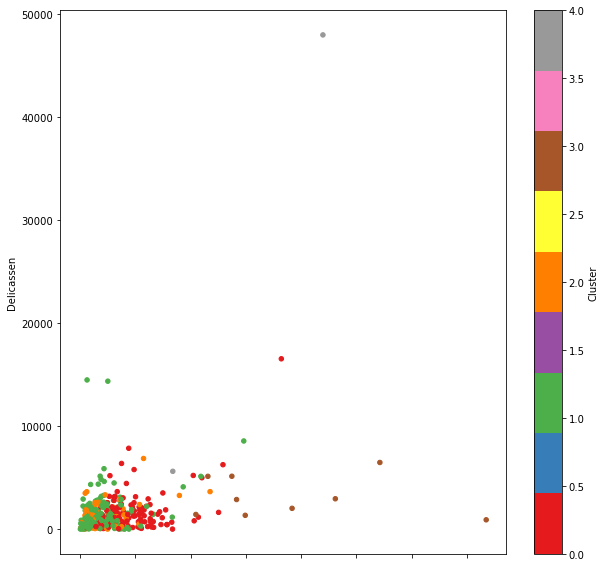

In [15]:
# 변수별 산점도를 그려 군집결과 확인
df.plot(kind='scatter', x= 'Grocery', y='Frozen', c='Cluster', cmap='Set1', colorbar=False, figsize=(10,10)) 
df.plot(kind='scatter', x= 'Milk', y='Delicassen', c='Cluster', cmap='Set1', colorbar=True, figsize=(10,10))
plt.show()
plt.close()

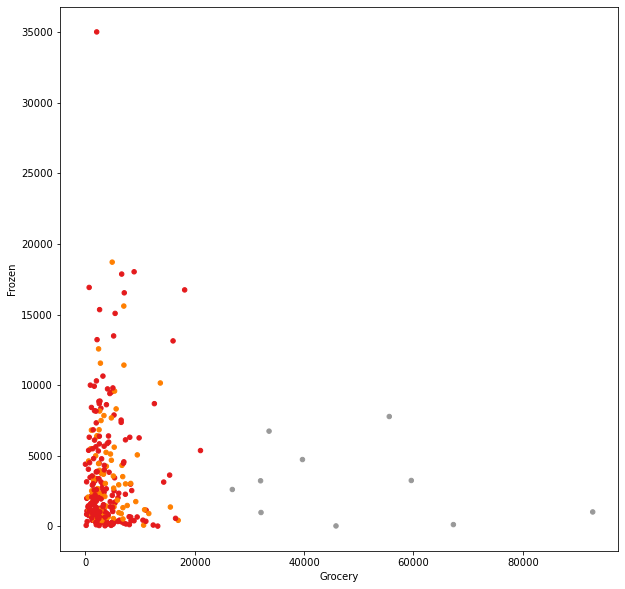

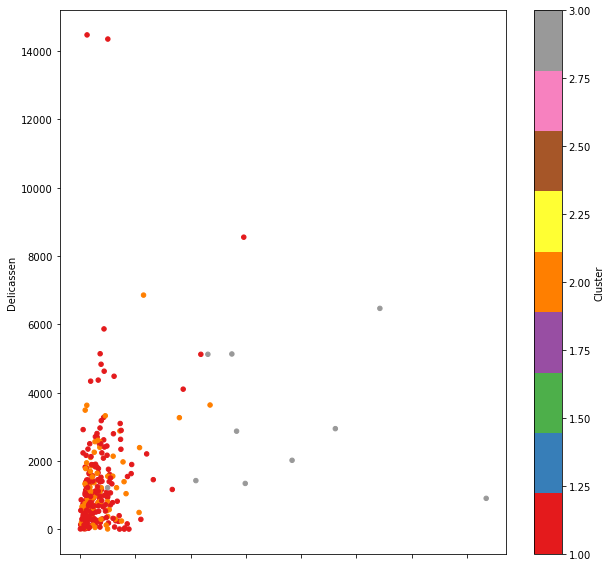

In [16]:
# 지나치게 큰 값들로 인해 확인이 어려우므로 해당 데이터를 제외하고 다시 확인
mask = (df['Cluster']==0) | (df['Cluster']==4)
ndf=df[~mask] # Cluster 컬럼의 값이 0이거나 4인 행을 제외하고 새로운 데이터프레임으로 저장

ndf.plot(kind='scatter', x= 'Grocery', y='Frozen', c='Cluster', cmap='Set1', colorbar=False, figsize=(10,10)) 
ndf.plot(kind='scatter', x= 'Milk', y='Delicassen', c='Cluster', cmap='Set1', colorbar=True, figsize=(10,10))
plt.show()
plt.close()

# DBSCAN

In [24]:
## 데이터 준비
df = pd.read_excel('e:/data_파이썬머신러닝판다스데이터분석/part7/2016_middle_shcool_graduates_report.xlsx', header=0)

pd.set_option('display.max_colwidth', 10) # 출력할 컬럼의 너비
pd.set_option('display.max_rows', 100) # 출력 행의 개수 한도
pd.set_option('display.max_columns', 10) # 출력할 컬럼의 개수 한도
pd.set_option('display.width', None) # 출력 화면의 너비
pd.set_option('display.unicode.east_asian_width', True) # 유니코드 사용 너비 조정

df.drop('Unnamed: 0', axis=1, inplace=True)
print(df.columns.values)

['지역' '학교명' '코드' '유형' '주야' '남학생수' '여학생수' '일반고' '특성화고' '과학고' '외고_국제고'
 '예고_체고' '마이스터고' '자사고' '자공고' '기타진학' '취업' '미상' '위도' '경도']


In [25]:
## 데이터 살펴보기
df.head()

,지역,학교명,코드,유형,주야,...,기타진학,취업,미상,위도,경도
0,성북구,서울대학교사...,3,국립,주간,...,0.004,0,0.000,37.594942,127.03...
1,종로구,서울대학교사...,3,국립,주간,...,0.031,0,0.000,37.577473,127.00...
2,강남구,개원중학교...,3,공립,주간,...,0.009,0,0.003,37.491637,127.07...
3,강남구,개포중학교...,3,공립,주간,...,0.019,0,0.000,37.480439,127.06...
4,서초구,경원중학교...,3,공립,주간,...,0.010,0,0.000,37.510750,127.00...


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 415 entries, 0 to 414
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   지역      415 non-null    object 
 1   학교명     415 non-null    object 
 2   코드      415 non-null    int64  
 3   유형      415 non-null    object 
 4   주야      415 non-null    object 
 5   남학생수    415 non-null    int64  
 6   여학생수    415 non-null    int64  
 7   일반고     415 non-null    float64
 8   특성화고    415 non-null    float64
 9   과학고     415 non-null    float64
 10  외고_국제고  415 non-null    float64
 11  예고_체고   415 non-null    float64
 12  마이스터고   415 non-null    float64
 13  자사고     415 non-null    float64
 14  자공고     415 non-null    float64
 15  기타진학    415 non-null    float64
 16  취업      415 non-null    int64  
 17  미상      415 non-null    float64
 18  위도      415 non-null    float64
 19  경도      415 non-null    float64
dtypes: float64(12), int64(4), object(4)
memory usage: 65.0+ KB


In [27]:
df.describe()

,코드,남학생수,여학생수,일반고,특성화고,...,기타진학,취업,미상,위도,경도
count,415.00...,415.00...,415.00...,415.00...,415.00...,...,415.00...,415.0,415.00...,415.00...,415.00...
mean,3.197590,126.53...,116.17...,0.623080,0.149684,...,0.069571,0.0,0.001670,37.491969,127.03...
std,0.804272,79.217906,76.833082,0.211093,0.102977,...,0.235630,0.0,0.003697,0.348926,0.265245
min,3.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,34.979940,126.63...
25%,3.000000,80.000000,71.500000,0.566500,0.065500,...,0.000000,0.0,0.000000,37.501934,126.92...
50%,3.000000,129.00...,118.00...,0.681000,0.149000,...,0.007000,0.0,0.000000,37.547702,127.01...
75%,3.000000,177.50...,161.50...,0.758000,0.224500,...,0.015000,0.0,0.003000,37.590670,127.07...
max,9.000000,337.00...,422.00...,0.908000,0.477000,...,1.000000,0.0,0.036000,37.694777,129.10...


In [29]:
# 지도상에서 각 학교의 위치 살펴보기
mschool_map = folium.Map(location=[37.55,126.98], tiles='Stamen Terrain', zoom_start=12) # map 객체 생성

for name, lat, lng in zip(df.학교명, df.위도, df.경도):
    folium.CircleMarker([lat,lng], # 위도, 경도
                       radius=5, # 반지름
                       color='brown', # 색상
                       fill=True, # 내부채우기 여부 
                       fill_color='coral', # 내부 색상
                       fill_opacity=0.7, # 내부 투명도
                       popup=name # 마우스 클릭시 출력 데이터
                       ).add_to(mschool_map) # 생성한 map객체에 추가
    
mschool_map

In [31]:
# 데이터 전처리
label_encoder = preprocessing.LabelEncoder()
onehot_encoder = preprocessing.OneHotEncoder()

onehot_location = label_encoder.fit_transform(df['지역'])
onehot_code = label_encoder.fit_transform(df['코드'])
onehot_type = label_encoder.fit_transform(df['유형'])
onehot_day = label_encoder.fit_transform(df['주야'])

df['location'] = onehot_location
df['code'] = onehot_code
df['type'] = onehot_type
df['day'] = onehot_day

df.head()

,지역,학교명,코드,유형,주야,...,경도,location,code,type,day
0,성북구,서울대학교사...,3,국립,주간,...,127.03...,16,0,1,0
1,종로구,서울대학교사...,3,국립,주간,...,127.00...,22,0,1,0
2,강남구,개원중학교...,3,공립,주간,...,127.07...,0,0,0,0
3,강남구,개포중학교...,3,공립,주간,...,127.06...,0,0,0,0
4,서초구,경원중학교...,3,공립,주간,...,127.00...,14,0,0,0


In [33]:
## 학습 및 검증

# 피쳐 선택
columns_list = [9,10,13]
X=df.iloc[:,columns_list]
print(X[:5], '\n')

# 데이터 정규화
X = StandardScaler().fit_transform(X)

# DBSCAN 객체 생성
dbm = cluster.DBSCAN(eps=0.2, # 밀도 계산의 기준이 되는 반지름
                    min_samples=5) # 최소 포인트 개수

# 학습
dbm.fit(X)

# 군집 결과 확인
cluster_label = dbm.labels_ # -1은 noise, 나머지 0부터가 군집
print(cluster_label, '\n')

# 결과를 데이터프레임에 새로운 컬럼으로 추가
df['Cluster'] = cluster_label
df.head()

   과학고  외고_국제고  자사고
0   0.018      0.007     0.227
1   0.000      0.035     0.043
2   0.009      0.012     0.090
3   0.013      0.013     0.065
4   0.007      0.010     0.282 

[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  0 -1 -1 -1 -1 -1 -1  2 -1  0 -1
 -1 -1 -1 -1  0 -1 -1 -1 -1 -1  0  3 -1 -1 -1 -1 -1 -1 -1  0 -1 -1  1  0
 -1 -1 -1  0 -1 -1 -1 -1  0 -1  0  0 -1 -1  0 -1 -1 -1  0  0 -1 -1  0 -1
 -1 -1  0 -1 -1 -1  0  2  0  0  0  0  0 -1 -1 -1  0 -1  0 -1 -1  0 -1  0
 -1  0  0 -1 -1 -1 -1  1  0 -1  0  0 -1 -1 -1  0 -1 -1 -1 -1 -1  0  1 -1
 -1  0  2  0 -1 -1  1 -1 -1 -1  0  0  0 -1 -1  0 -1 -1 -1  0  0 -1 -1 -1
 -1  0 -1 -1 -1  0 -1 -1 -1  0 -1  0  0 -1 -1 -1 -1 -1  0 -1  0  0 -1 -1
 -1 -1 -1  0 -1 -1 -1  1  0  3  1 -1  0  0 -1  0 -1 -1  0  0  2 -1 -1  3
  0  0 -1 -1 -1 -1  0 -1  0  0 -1  0  0  0 -1 -1  0 -1 -1 -1 -1 -1  2  0
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  0 -1 -1 -1  0 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1  0 -1 -1 -1  0  0 -1 -1  0 -1  3  0  2 -1 -1
 -1 -1  0 -1 -1 -1  

,지역,학교명,코드,유형,주야,...,location,code,type,day,Cluster
0,성북구,서울대학교사...,3,국립,주간,...,16,0,1,0,-1
1,종로구,서울대학교사...,3,국립,주간,...,22,0,1,0,-1
2,강남구,개원중학교...,3,공립,주간,...,0,0,0,0,-1
3,강남구,개포중학교...,3,공립,주간,...,0,0,0,0,-1
4,서초구,경원중학교...,3,공립,주간,...,14,0,0,0,-1


In [37]:
# 클러스터 값으로 그룹화하고 그룹별로 내용 출력
grouped_cols = [0,1,3] + columns_list
grouped = df.groupby('Cluster')
for key,group in grouped:
    print('* key :',key)
    print('* number :', len(group))
    print(group.iloc[:,grouped_cols].head(), '\n')

# 지도상에 색상 점으로 시각화
colors = {-1:'gray',0:'coral',1:'blue',2:'green',3:'red',4:'purple',5:'orange',6:'brown',7:'brick',8:'yellow',9:'magenta',10:'cyan',11:'tan'}
cluster_map = folium.Map(location=[37.55,126.98], tiles='Stamen Terrain', zoom_start=12) # map 객체 생성

for name, lat, lng, clus in zip(df.학교명, df.위도, df.경도, df.Cluster):
    folium.CircleMarker([lat,lng], 
                       radius=5, 
                       color=colors[clus],
                       fill=True, 
                       fill_color=colors[clus],
                       fill_opacity=0.7,
                       popup=name 
                       ).add_to(cluster_map) # 생성한 map객체에 추가
    
cluster_map

* key : -1
* number : 255
     지역           학교명  유형  과학고  외고_국제고  자사고
0  성북구  서울대학교사...  국립   0.018      0.007     0.227
1  종로구  서울대학교사...  국립   0.000      0.035     0.043
2  강남구  개원중학교....   공립   0.009      0.012     0.090
3  강남구  개포중학교....   공립   0.013      0.013     0.065
4  서초구  경원중학교....   공립   0.007      0.010     0.282 

* key : 0
* number : 102
      지역           학교명  유형  과학고  외고_국제고  자사고
13  서초구  동덕여자중학...  사립     0.0      0.022     0.038
22  강남구  수서중학교....   공립     0.0      0.019     0.044
28  서초구  언남중학교....   공립     0.0      0.015     0.050
34  강남구  은성중학교....   사립     0.0      0.016     0.065
43  송파구  거원중학교....   공립     0.0      0.021     0.054 

* key : 1
* number : 45
         지역           학교명  유형  과학고  외고_국제고  자사고
46     강동구  동신중학교....   사립     0.0        0.0     0.044
103    양천구  신원중학교....   공립     0.0        0.0     0.006
118    구로구  개봉중학교....   공립     0.0        0.0     0.012
126  영등포구  대림중학교....   공립     0.0        0.0     0.050
175    중랑구  혜원여자중학...  사립     0.0      

In [40]:
## 유형 컬럼을 피쳐로 추가하여 과정 반복해보기

# 피쳐 선택
columns_list2 = [9,10,13,22]
X2=df.iloc[:,columns_list2]
print(X2[:5], '\n')

# 데이터 정규화
X2 = StandardScaler().fit_transform(X2)

# DBSCAN 객체 생성
dbm2 = cluster.DBSCAN(eps=0.2, # 밀도 계산의 기준이 되는 반지름
                    min_samples=5) # 최소 포인트 개수

# 학습
dbm2.fit(X2)


# 결과를 데이터프레임에 새로운 컬럼으로 추가
cluster_label2 = dbm2.labels_ # -1은 noise, 나머지 0부터가 군집
df['Cluster2'] = cluster_label2

# 클러스터 값으로 그룹화하고 그룹별로 내용 출력
grouped2_cols = [0,1,3] + columns_list2
grouped2 = df.groupby('Cluster2')
for key,group in grouped2:
    print('* key :',key)
    print('* number :', len(group))
    print(group.iloc[:,grouped2_cols].head(), '\n')

# 지도상에 색상 점으로 시각화
colors = {-1:'gray',0:'coral',1:'blue',2:'green',3:'red',4:'purple',5:'orange',6:'brown',7:'brick',8:'yellow',9:'magenta',10:'cyan',11:'tan'}
cluster_map2 = folium.Map(location=[37.55,126.98], tiles='Stamen Terrain', zoom_start=12) # map 객체 생성

for name, lat, lng, clus in zip(df.학교명, df.위도, df.경도, df.Cluster2):
    folium.CircleMarker([lat,lng], 
                       radius=5, 
                       color=colors[clus],
                       fill=True, 
                       fill_color=colors[clus],
                       fill_opacity=0.7,
                       popup=name 
                       ).add_to(cluster_map2) # 생성한 map객체에 추가
    
cluster_map2

   과학고  외고_국제고  자사고  type
0   0.018      0.007     0.227     1
1   0.000      0.035     0.043     1
2   0.009      0.012     0.090     0
3   0.013      0.013     0.065     0
4   0.007      0.010     0.282     0 

* key : -1
* number : 281
     지역           학교명  유형  과학고  외고_국제고  자사고  type
0  성북구  서울대학교사...  국립   0.018      0.007     0.227     1
1  종로구  서울대학교사...  국립   0.000      0.035     0.043     1
2  강남구  개원중학교....   공립   0.009      0.012     0.090     0
3  강남구  개포중학교....   공립   0.013      0.013     0.065     0
4  서초구  경원중학교....   공립   0.007      0.010     0.282     0 

* key : 0
* number : 8
       지역          학교명  유형  과학고  외고_국제고  자사고  type
22   강남구  수서중학교....  공립     0.0      0.019     0.044     0
43   송파구  거원중학교....  공립     0.0      0.021     0.054     0
51   송파구  방이중학교....  공립     0.0      0.021     0.068     0
93   강서구  방원중학교....  공립     0.0      0.019     0.057     0
164  중랑구  원묵중학교....  공립     0.0      0.020     0.062     0 

* key : 1
* number : 59
      지역          학교명  유형 

In [41]:
## 속성을 줄여서 재반복

# 피쳐 선택
columns_list3 = [9,10]
X3=df.iloc[:,columns_list3]

# 데이터 정규화
X3 = StandardScaler().fit_transform(X3)

# DBSCAN 객체 생성
dbm3 = cluster.DBSCAN(eps=0.2, # 밀도 계산의 기준이 되는 반지름
                    min_samples=5) # 최소 포인트 개수

# 학습
dbm3.fit(X3)


# 결과를 데이터프레임에 새로운 컬럼으로 추가
cluster_label3 = dbm3.labels_ # -1은 noise, 나머지 0부터가 군집
df['Cluster3'] = cluster_label3

# 클러스터 값으로 그룹화하고 그룹별로 내용 출력
grouped3_cols = [0,1,3] + columns_list3
grouped3 = df.groupby('Cluster3')
for key,group in grouped3:
    print('* key :',key)
    print('* number :', len(group))
    print(group.iloc[:,grouped3_cols].head(), '\n')

# 지도상에 색상 점으로 시각화
colors = {-1:'gray',0:'coral',1:'blue',2:'green',3:'red',4:'purple',5:'orange',6:'brown',7:'brick',8:'yellow',9:'magenta',10:'cyan',11:'tan'}
cluster_map3 = folium.Map(location=[37.55,126.98], tiles='Stamen Terrain', zoom_start=12) # map 객체 생성

for name, lat, lng, clus in zip(df.학교명, df.위도, df.경도, df.Cluster3):
    folium.CircleMarker([lat,lng], 
                       radius=5, 
                       color=colors[clus],
                       fill=True, 
                       fill_color=colors[clus],
                       fill_opacity=0.7,
                       popup=name 
                       ).add_to(cluster_map3) # 생성한 map객체에 추가
    
cluster_map3

* key : -1
* number : 61
     지역           학교명  유형  과학고  외고_국제고
0  성북구  서울대학교사...  국립   0.018      0.007
3  강남구  개포중학교....   공립   0.013      0.013
6  강남구  압구정중학교...  공립   0.015      0.036
7  강남구  단국대학교사...  사립   0.032      0.005
8  강남구  대명중학교....   공립   0.013      0.029 

* key : 0
* number : 160
      지역           학교명  유형  과학고  외고_국제고
1   종로구  서울대학교사...  국립     0.0      0.035
13  서초구  동덕여자중학...  사립     0.0      0.022
22  강남구  수서중학교....   공립     0.0      0.019
28  서초구  언남중학교....   공립     0.0      0.015
29  강남구  언북중학교....   공립     0.0      0.007 

* key : 1
* number : 111
      지역          학교명  유형  과학고  외고_국제고
2   강남구  개원중학교....  공립   0.009      0.012
4   서초구  경원중학교....  공립   0.007      0.010
5   강남구  구룡중학교....  공립   0.007      0.007
11  강남구  대치중학교....  공립   0.007      0.024
14  서초구  반포중학교....  공립   0.010      0.013 

* key : 2
* number : 50
         지역          학교명  유형  과학고  외고_국제고
46     강동구  동신중학교....  사립     0.0        0.0
103    양천구  신원중학교....  공립     0.0        0.0
118    구로구  개봉중